In [1]:
import fastbook 
fastbook.setup_book()

In [4]:
from fastai.vision.all import *
import os
import pandas as pd
path=Path()

# Creating Data For CNN

In [3]:
df=pd.read_csv('Train/CarType/stanford_cars_type.csv')
df.head()

,Unnamed: 0,file_name,car_code,car_name,brand,car_type,new_filename
0,0,00001.jpg,14,Audi TTS Coupe 2012,Audi,Coupe,00001_Audi TTS Coupe 2012.jpg
1,1,00002.jpg,3,Acura TL Sedan 2012,Acura,Sedan,00002_Acura TL Sedan 2012.jpg
2,2,00003.jpg,91,Dodge Dakota Club Cab 2007,Dodge,Cab,00003_Dodge Dakota Club Cab 2007.jpg
3,3,00004.jpg,134,Hyundai Sonata Hybrid Sedan 2012,Hyundai,Sedan,00004_Hyundai Sonata Hybrid Sedan 2012.jpg
4,4,00005.jpg,106,Ford F-450 Super Duty Crew Cab 2012,Ford,Cab,00005_Ford F-450 Super Duty Crew Cab 2012.jpg


In [4]:
dblock=DataBlock()

In [5]:
dsets=dblock.datasets(df)

In [6]:
len(dsets.train),len(dsets.valid)

(6516, 1628)

In [7]:
x,y=dsets.train[0]

In [8]:
x,y

(Unnamed: 0                                       7930
 file_name                                   07931.jpg
 car_code                                           56
 car_name                  Chevrolet Corvette ZR1 2012
 brand                                       Chevrolet
 car_type                                        Other
 new_filename    07931_Chevrolet Corvette ZR1 2012.jpg
 Name: 7930, dtype: object,
 Unnamed: 0                                       7930
 file_name                                   07931.jpg
 car_code                                           56
 car_name                  Chevrolet Corvette ZR1 2012
 brand                                       Chevrolet
 car_type                                        Other
 new_filename    07931_Chevrolet Corvette ZR1 2012.jpg
 Name: 7930, dtype: object)

In [9]:
x['new_filename']

'07931_Chevrolet Corvette ZR1 2012.jpg'

In [10]:
dblock=DataBlock(get_x=lambda r: r['new_filename'],get_y=lambda r: r[['car_name','car_type','brand']])
dsets=dblock.datasets(df)
dsets.train[0]

('03657_Chrysler PT Cruiser Convertible 2008.jpg',
 car_name    Chrysler PT Cruiser Convertible 2008
 car_type                             Convertible
 brand                                   Chrysler
 Name: 3656, dtype: object)

In [11]:
def get_x(r): return r['new_filename']
def get_y(r): return r[['car_name','car_type','brand']]
dblock=DataBlock(get_x=get_x,get_y=get_y)
dsets=dblock.datasets(df)
dsets.train[0]

('07521_Honda Accord Sedan 2012.jpg',
 car_name    Honda Accord Sedan 2012
 car_type                      Sedan
 brand                         Honda
 Name: 7520, dtype: object)

In [12]:
path=Path()
def get_x(r): return path/'Train'/'CarType'/r['new_filename']
def get_y(r): return r[['car_name','car_type','brand']]
dblock=DataBlock(get_x=get_x,get_y=get_y)
dsets=dblock.datasets(df)
dsets.train[0]

(Path('Train/CarType/04047_Geo Metro Convertible 1993.jpg'),
 car_name    Geo Metro Convertible 1993
 car_type                   Convertible
 brand                              Geo
 Name: 4046, dtype: object)

In [13]:
dblock=DataBlock(blocks=(ImageBlock,MultiCategoryBlock),
                get_x=get_x,get_y=get_y)
dsets=dblock.datasets(df)
dsets.train[0]

(PILImage mode=RGB size=1200x820,
 TensorMultiCategory([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 

In [14]:
idxs=torch.where(dsets.train[0][1]==1.)[0]
dsets.train.vocab[idxs]

(#3) ['Mercedes-Benz','Mercedes-Benz Sprinter Van 2012','Van']

In [15]:
# def splitter(df):
#     train=df.index[~df['is_valid']].to_list()
#     valid=df.index[df['is_valid']].to_list()
#     return train,valid
dblock=DataBlock(blocks=(ImageBlock,MultiCategoryBlock),
                splitter=RandomSplitter(valid_pct=0.2,seed=42),
                get_x=get_x,
                get_y=get_y)
dset=dblock.datasets(df)
dsets.train[0]

(PILImage mode=RGB size=1200x820,
 TensorMultiCategory([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 

In [16]:
dblock=DataBlock(blocks=(ImageBlock,MultiCategoryBlock),
                splitter=RandomSplitter(valid_pct=0.2,seed=42),
                get_x=get_x,
                get_y=get_y,
                item_tfms=RandomResizedCrop(128,min_scale=0.35))
dls=dblock.dataloaders(df)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


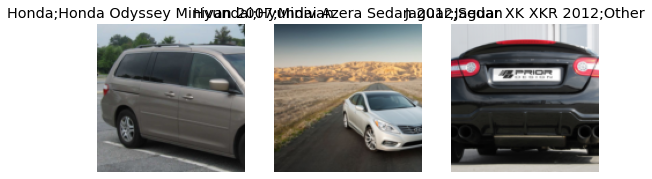

In [17]:
dls.show_batch(nrows=1,ncols=3)

# Creating CNN

In [18]:
def get_data(presize,resize):
    return  DataBlock(
    blocks=(ImageBlock,MultiCategoryBlock),
    get_x=get_x,
    get_y=get_y,
    splitter=RandomSplitter(valid_pct=0.2,seed=42),
    item_tfms=Resize(presize),
    batch_tfms=[*aug_transforms(min_scale=0.5,size=resize),
               Normalize.from_stats(*imagenet_stats)],
    ).dataloaders(df,bs=15)

In [19]:
dls=get_data(160,128)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


C:\Users\mayan\anaconda3\envs\GPU\lib\site-packages\torch\_tensor.py:1051: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  ..\aten\src\ATen\native\BatchLinearAlgebra.cpp:766.)
  ret = func(*args, **kwargs)


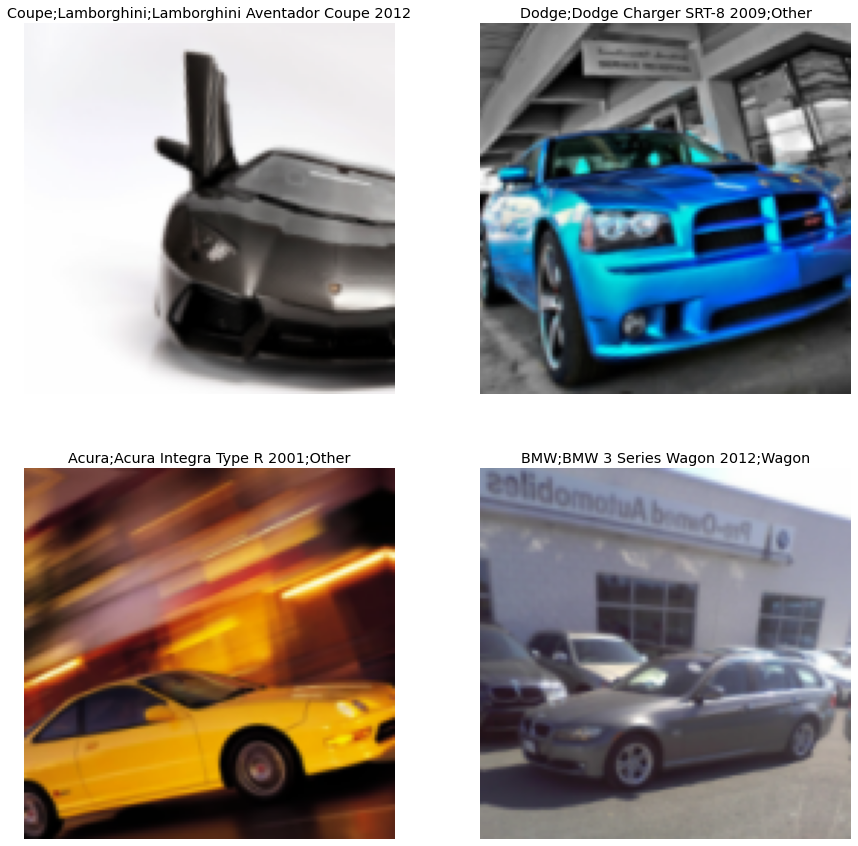

In [20]:
dls.show_batch(max_n=4,figsize=(15,15))

In [21]:
def block(ni,nf): return ConvLayer(ni,nf,stride=2)
def get_model():
    return nn.Sequential(
    block(3,16),
    block(16,32),
    block(32,64),
    block(64,128),
    block(128,256),
    nn.AdaptiveAvgPool2d(1),
    Flatten(),
    nn.Linear(256,dls.c))

In [22]:
def get_learner(m):
    return Learner(dls,m,loss_func=nn.CrossEntropyLoss(),metrics=partial(accuracy_multi,thresh=0.2))
learn=get_learner(get_model())

SuggestedLRs(valley=0.013182567432522774)

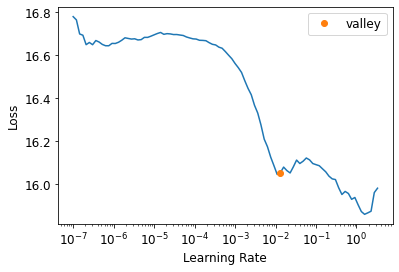

In [23]:
learn.lr_find()

In [24]:
learn.fit_one_cycle(5,3e-3)

epoch,train_loss,valid_loss,accuracy_multi,time
0,14.143559,14.150433,0.338021,05:40
1,13.942811,13.926138,0.431948,02:30
2,13.653641,13.868283,0.633605,02:32
3,13.424868,13.636151,0.768531,02:19
4,13.337064,13.582483,0.780595,02:24


In [25]:
class ResBlock(Module):
    def __init__(self,ni,nf):
        self.convs=nn.Sequential(
        ConvLayer(ni,nf),
        ConvLayer(nf,nf,norm_type=NormType.BatchZero))
    def forward(sefl,x): return x+self.convs(x)

In [26]:
def _conv_block(ni,nf,stride):
    return nn.Sequential(
    ConvLayer(ni,nf,stride=stride),
    ConvLayer(nf,nf,act_cls=None,norm_type=NormType.BatchZero))

In [27]:
class ResBlock(Module):
    def __init__(self,ni,nf,stride=1):
        self.convs=_conv_block(ni,nf,stride)
        self.idconv=noop if ni==nf else ConvLayer(ni,nf,1,act_cls=None)
        self.pool=noop if stride==1 else nn.AvgPool2d(2,ceil_mode=True)
    def forward(self,x):
        return F.relu(self.convs(x)+self.idconv(self.pool(x)))

In [28]:
def block(ni,nf): return ResBlock(ni,nf,stride=2)
learn=get_learner(get_model())
learn.fit_one_cycle(5,3e-3)

epoch,train_loss,valid_loss,accuracy_multi,time
0,14.138700,14.195129,0.393308,02:30
1,13.942485,13.910099,0.468647,02:24
2,13.761376,13.757603,0.675162,02:10
3,13.423588,13.622315,0.772831,02:10
4,13.352635,13.594493,0.794975,02:10


In [29]:
def block(ni,nf):
    return nn.Sequential(ResBlock(ni,nf,stride=2),ResBlock(nf,nf))

In [30]:
learn=get_learner(get_model())
learn.fit_one_cycle(5,3e-3)

epoch,train_loss,valid_loss,accuracy_multi,time
0,14.122973,14.229836,0.394633,02:16
1,13.850256,13.900065,0.494021,02:16
2,13.704927,13.698377,0.649012,02:18
3,13.424984,13.550982,0.747820,02:19
4,13.216958,13.480087,0.770350,02:55


In [31]:
def _resnet_stem(*sizes):
    return [
        ConvLayer(sizes[i],sizes[i+1],3,stride=2 if i==0 else 1)
        for i in range(len(sizes)-1)
    ]+[nn.MaxPool2d(kernel_size=3,stride=2,padding=1)]

In [32]:
_resnet_stem(3,32,32,64)

[ConvLayer(
   (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
   (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
   (2): ReLU()
 ),
 ConvLayer(
   (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
   (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
   (2): ReLU()
 ),
 ConvLayer(
   (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
   (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
   (2): ReLU()
 ),
 MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)]

In [33]:
class ResNet(nn.Sequential):
    def __init__(self,n_out,layers,expansion=1):
        stem=_resnet_stem(3,32,32,64)
        self.block_szs=[64,64,128,256,512]
        for i in range(1,5): self.block_szs[i]*=expansion
        blocks=[self._make_layer(*o) for o in enumerate(layers)]
        super().__init__(*stem,*blocks,
                        nn.AdaptiveAvgPool2d(1),Flatten(),
                        nn.Linear(self.block_szs[-1],n_out))
    def _make_layer(self,idx,n_layers):
        stride=1 if idx==0 else 2
        ch_in,ch_out=self.block_szs[idx:idx+2]
        return nn.Sequential(*[
            ResBlock(ch_in if i==0 else ch_out,ch_out,stride if i==0 else 1)
            for i in range(n_layers)
        ])

In [34]:
rn=ResNet(dls.c,[2,2,2,2])

In [35]:
learn=get_learner(rn)
learn.fit_one_cycle(5,3e-3)

epoch,train_loss,valid_loss,accuracy_multi,time
0,14.085295,14.348236,0.450884,02:57
1,13.862606,14.082176,0.592520,03:06
2,13.499036,13.497712,0.720326,02:43
3,13.049730,13.085435,0.832697,02:40
4,12.809805,12.986027,0.854965,02:48


In [36]:
def _conv_block(ni,nf,stride):
    return nn.Sequential(
    ConvLayer(ni,nf//4,1),
    ConvLayer(nf//4,nf//4,stride=stride),
    ConvLayer(nf//4,nf,1,act_cls=None,norm_type=NormType.BatchZero))

In [37]:
rn=ResNet(dls.c,[3,4,6,3],4)

In [38]:
learn=get_learner(rn)
learn.fit_one_cycle(15,3e-3)

epoch,train_loss,valid_loss,accuracy_multi,time
0,14.172675,14.168848,0.667449,03:13
1,14.018697,14.354703,0.575213,03:33
2,13.820158,15.031622,0.679886,03:24
3,13.532348,14.797049,0.802541,03:20
4,13.160453,15.535095,0.900587,03:14
5,12.899187,12.936184,0.904251,03:00
6,12.285652,13.165250,0.959411,02:53
7,12.117346,12.437616,0.976988,02:53
8,11.877395,11.861455,0.985619,02:53
9,11.569207,12.744155,0.987874,02:54


In [39]:
learn.export(fname='StandFordCar.pkl')

In [40]:
path=Path()
path.ls(file_exts='.pkl')

(#2) [Path('StandFordCar.pkl'),Path('VGames.pkl')]

In [41]:
learn_inf=load_learner(path/'StandFordCar.pkl')

In [42]:
learn_inf.predict('cars/aura.jfif')

((#0) [],
 TensorBase([-27.9029, -27.9512,  -7.5598, -13.3619,  -8.6456,  -9.4670, -10.9907, -10.7415,  -8.7123, -11.6490, -13.8977, -12.7523, -12.2902, -16.7875,  -7.5008, -11.9971, -11.7703,  -9.7485, -13.8155,
         -11.1333, -10.7192, -10.8165, -13.0538, -11.6172,  -9.3286, -12.9463, -17.8412, -10.8683,  -9.8541,  -7.0228, -10.6305, -13.0189, -12.3714,  -8.5718,  -9.4001, -10.0766, -14.2317, -10.4017,
         -11.2599,  -8.6985, -10.0234, -10.3374, -10.8693,  -6.6003,  -9.1165,  -8.7161,  -9.0144, -11.6281, -13.8829,  -7.3636, -12.1865, -12.6357, -14.2421,  -8.2563,  -9.6805, -12.0495, -11.1375,
         -10.0328, -15.2832,  -7.4450,  -8.8125, -11.7126,  -7.4369,  -8.6980, -17.2021, -10.7018, -12.3793, -16.2633, -14.2266, -13.8215, -23.0876, -22.1252, -13.5562, -13.4273, -10.2435, -12.7523,
         -12.6296, -19.9054, -24.6432, -21.7604, -21.0671, -25.4432,  -9.2333, -17.6022, -11.4861, -12.6667,  -6.6408,  -9.1163, -10.9031,  -7.7722,  -9.4605, -10.9020,  -9.5094,  -6.5144,  